<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Multiclass_classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification - Weather Type
Runtime > Change runtime type > T4 GPU

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# You are data scientist hired to predict the weather outlook

# Step 1 - Data Ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Target Feature - Weather Type

In [7]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

# Step 2 - Perform basic data quality checks

In [4]:
df.shape

(13200, 11)

In [5]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


# Step 3 - Seperate X and Y(Weather Type)

In [9]:
X = df.drop(columns = ["Weather Type"])
Y = df["Weather Type"]

In [10]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [11]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


# Step 4 - Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
xtrain.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
3958,32.0,66,6.0,92.0,partly cloudy,1010.21,2,Spring,1.5,inland
2239,15.0,96,11.0,57.0,overcast,1016.98,0,Autumn,4.0,mountain
3608,28.0,58,6.5,11.0,clear,1025.37,10,Summer,9.0,inland
6848,47.0,84,44.5,85.0,overcast,992.26,2,Winter,2.0,coastal
6119,18.0,66,14.0,10.0,partly cloudy,1000.04,1,Autumn,8.0,coastal


In [14]:
ytrain.head()

,Weather Type
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [15]:
xtest.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
4111,23.0,38,4.5,6.0,clear,1021.19,9,Autumn,10.0,inland
10607,62.0,94,14.5,83.0,clear,1025.57,10,Summer,4.0,inland
7372,40.0,51,2.0,12.0,partly cloudy,1025.15,8,Spring,8.0,mountain
11786,-7.0,79,6.5,90.0,overcast,993.56,0,Winter,1.5,inland
12227,21.0,94,10.0,109.0,partly cloudy,1027.71,11,Spring,9.0,mountain


In [16]:
ytest.head()

,Weather Type
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [17]:
xtrain.shape

(10560, 10)

In [18]:
xtest.shape

(2640, 10)

# Step 5 - Apply preprocessing on X

In [20]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [21]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Cloud Cover', 'Season', 'Location']

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [23]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [24]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [25]:
pre.fit(xtrain)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [26]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
3958,0.727984,-0.129706,-0.553679,1.204747,0.123123,-0.523097,-1.179544,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2239,-0.248339,1.352488,0.170676,0.109053,0.304828,-1.041944,-0.436072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.498261,-0.524958,-0.481244,-1.331000,0.530012,1.552291,1.050873,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6848,1.589447,0.759610,5.023858,0.985608,-0.358649,-0.523097,-1.030850,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6119,-0.076047,-0.129706,0.605290,-1.362306,-0.149837,-0.782520,0.753484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
4111,0.211107,-1.513087,-0.770986,-1.487528,0.417823,1.292867,1.348262,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.450909,1.253675,0.677725,0.922997,0.535380,1.552291,-0.436072,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,1.187431,-0.870803,-1.133164,-1.299695,0.524108,1.033444,0.753484,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,-1.511817,0.512578,-0.481244,1.142136,-0.323758,-1.041944,-1.179544,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.096246,1.253675,0.025805,1.736940,0.592817,1.811714,1.050873,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Apply one hot encoding on target feature (Only for multiclass classification)

In [29]:
ytrain_pre = pd.get_dummies(ytrain, dtype= int)
ytrain_pre.head()

,Cloudy,Rainy,Snowy,Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [30]:
ytest_pre = pd.get_dummies(ytest, dtype= int)
ytest_pre.head()

,Cloudy,Rainy,Snowy,Sunny
4111,0,0,0,1
10607,0,0,0,1
7372,0,0,0,1
11786,0,0,1,0
12227,0,0,0,1


# Step 6 - Build the model

In [33]:
xtrain_pre.shape

(10560, 15)

In [34]:
xtrain_pre.shape[1]

15

In [35]:
ytrain_pre.shape[1]

4

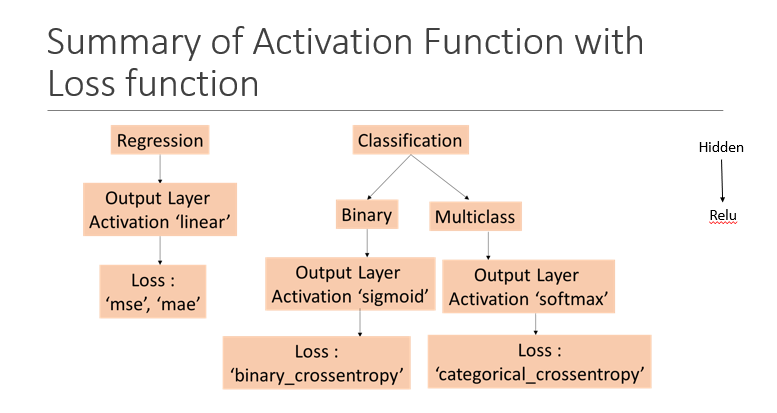

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [36]:
model = Sequential(
    [
        Input(shape = (xtrain_pre.shape[1], )),
        Dense(32, activation = "relu", kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(16, activation = "relu", kernel_regularizer=l2(0.001)),
        Dropout(0.1),
        Dense(ytrain_pre.shape[1], activation="softmax")
    ]
)

In [37]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [39]:
hist = model.fit(
    xtrain_pre, ytrain_pre, validation_split=0.2, epochs=100, callbacks = [es]
)

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5432 - loss: 1.1963 - val_accuracy: 0.8598 - val_loss: 0.5743
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.6349 - val_accuracy: 0.8807 - val_loss: 0.4219
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.4864 - val_accuracy: 0.8925 - val_loss: 0.3577
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.4385 - val_accuracy: 0.8954 - val_loss: 0.3392
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8776 - loss: 0.4010 - val_accuracy: 0.9015 - val_loss: 0.3198
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8741 - loss: 0.3927 - val_accuracy: 0.9044 - val_loss: 0.3059
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8851 - loss: 0.3731 - val_accuracy: 0.9091 - val_loss: 0.2968
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8876 - loss: 0.3471 - val_accu

# Step 7 - Evaluate model

In [40]:
train_loss, train_acc = model.evaluate(xtrain_pre, ytrain_pre)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 0.2068
Train Loss : 0.2066
Train Accuracy : 0.9188


In [41]:
test_loss, test_acc = model.evaluate(xtest_pre, ytest_pre)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_acc:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9072 - loss: 0.2321
Test loss : 0.2293
Test accuracy : 0.9083


In [44]:
yprob_test = model.predict(xtest_pre)
yprob_test[0:5]

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4.93203661e-05, 6.64892195e-06, 8.41949441e-05, 9.99859810e-01],
       [2.03798967e-03, 2.79800326e-04, 2.26802833e-04, 9.97455418e-01],
       [2.26881076e-03, 2.08961515e-04, 5.55614359e-04, 9.96966660e-01],
       [1.83763211e-06, 3.90137429e-05, 9.99942303e-01, 1.68388833e-05],
       [1.29534483e-01, 1.05398335e-02, 1.04045505e-02, 8.49521101e-01]],
      dtype=float32)

In [46]:
classes = ytrain_pre.columns.tolist()
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [47]:
import numpy as np
idx = np.argmax(yprob_test, axis=1)
idx[0:5]

array([3, 3, 3, 2, 3])

In [49]:
ypred_test = [classes[i] for i in idx]
ypred_test[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

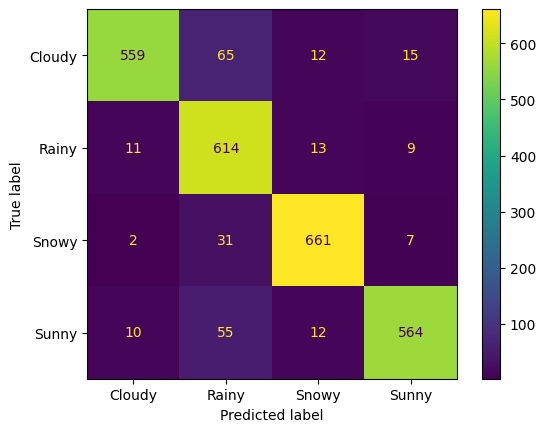

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.96      0.86      0.91       651
       Rainy       0.80      0.95      0.87       647
       Snowy       0.95      0.94      0.94       701
       Sunny       0.95      0.88      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.92      0.91      0.91      2640



# From above results it is clear that f1_macro > 0.8

# Step 8 - Out of Sample Prediction

In [55]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv


In [56]:
xnew = pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [57]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-1.109801,-0.030893,0.895032,0.390803,-0.555116,-1.041944,-1.030850,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.035295,1.895959,0.750161,0.922997,0.251685,1.811714,0.456095,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.018616,0.364359,0.387983,-0.579668,0.312343,-0.004250,0.753484,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.153676,1.500707,1.257209,0.140359,0.189954,-1.041944,-0.584766,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.785415,-2.155371,-0.263937,-1.487528,0.487069,0.514597,-0.138683,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# Perform predictions

In [59]:
probs = model.predict(xnew_pre)
probs[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[7.97495522e-06, 2.93873163e-04, 9.99645233e-01, 5.28518540e-05],
       [1.74599197e-02, 3.14752618e-03, 4.71415784e-04, 9.78921115e-01],
       [9.96405542e-01, 1.69667322e-03, 3.13583587e-04, 1.58422906e-03],
       [6.93531428e-03, 9.91625369e-01, 7.75500492e-04, 6.63825951e-04],
       [2.37581227e-03, 1.02140475e-04, 2.97463092e-04, 9.97224629e-01]],
      dtype=float32)

In [60]:
probs_idx = np.argmax(probs, axis=1)
probs_idx[0:5]

array([2, 3, 0, 1, 3])

In [61]:
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

In [62]:
preds = [classes[i] for i in probs_idx]
preds[0:5]

['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [63]:
xnew["weather_type"] = preds
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,weather_type
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny


In [64]:
xnew["weather_type"] = preds
xnew[classes] = probs.round(4)

In [65]:
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,weather_type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0003,0.9996,0.0001
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0175,0.0031,0.0005,0.9789
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9964,0.0017,0.0003,0.0016
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0069,0.9916,0.0008,0.0007
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0024,0.0001,0.0003,0.9972


In [66]:
xnew.to_csv("weather_results.csv", index=False)

# Step 9 - Save the preprocessor, model object

In [67]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [68]:
import joblib
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [69]:
model.save("weather_model.keras")

# Load the model object

In [70]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [71]:
from keras.models import load_model
m = load_model("weather_model.keras")
m

<Sequential name=sequential, built=True>

In [72]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (13.00 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,218 (8.67 KB)